# Module 11 Challenge

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from pathlib import Path
import warnings
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

## Finding Unusual Patterns in Hourly Google Search Traffic

In [2]:
# Loading the "google_hourly_search_trends.csv" file, storing in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    Path(r"Resources\google_hourly_search_trends.csv").absolute(),
    index_col="Date", infer_datetime_format=True, parse_dates=True)

# Review the first and last five rows of the DataFrame

display(df_mercado_trends.head())
display(df_mercado_trends.tail())


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [3]:
# Reviewing the data types of the DataFrame using the info function

df_mercado_trends.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [4]:
# Slicing the DataFrame to just the month of May 2020

df_may_2020 = df_mercado_trends.loc["2020-05-01":"2020-05-30"]

# Using hvPlot to visualize the data for May 2020

df_may_2020.hvplot()


:Curve   [Date]   (Search Trends)

In [5]:
# Calculating the sum of the total search traffic for May 2020

traffic_may_2020 = df_may_2020["Search Trends"].sum()

# Viewing the traffic_may_2020 value

traffic_may_2020


37014

In [6]:
# Calcluating the monthly median search traffic across all months 
# Grouping the DataFrame by index year and then index month, chaining the sum and then the median functions

median_monthly_traffic = df_mercado_trends["Search Trends"].groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# Viewing the median_monthly_traffic value

median_monthly_traffic


35172.5

In [7]:
# Comparing the seach traffic for the month of May 2020 to the overall monthly median value

if traffic_may_2020 > median_monthly_traffic:
    print("According to calculations May 2020 had higher traffic than the median monthly traffic.")
else:
    print("According to calculations May 2020 had lower traffic than the median monthly traffic.")


According to calculations May 2020 had higher traffic than the median monthly traffic.


#### Answer the following question :

#### **Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the Google search traffic increased during the month that MercardoLibre released its financial results!

## Mining the Search Traffic Data for Seasonality

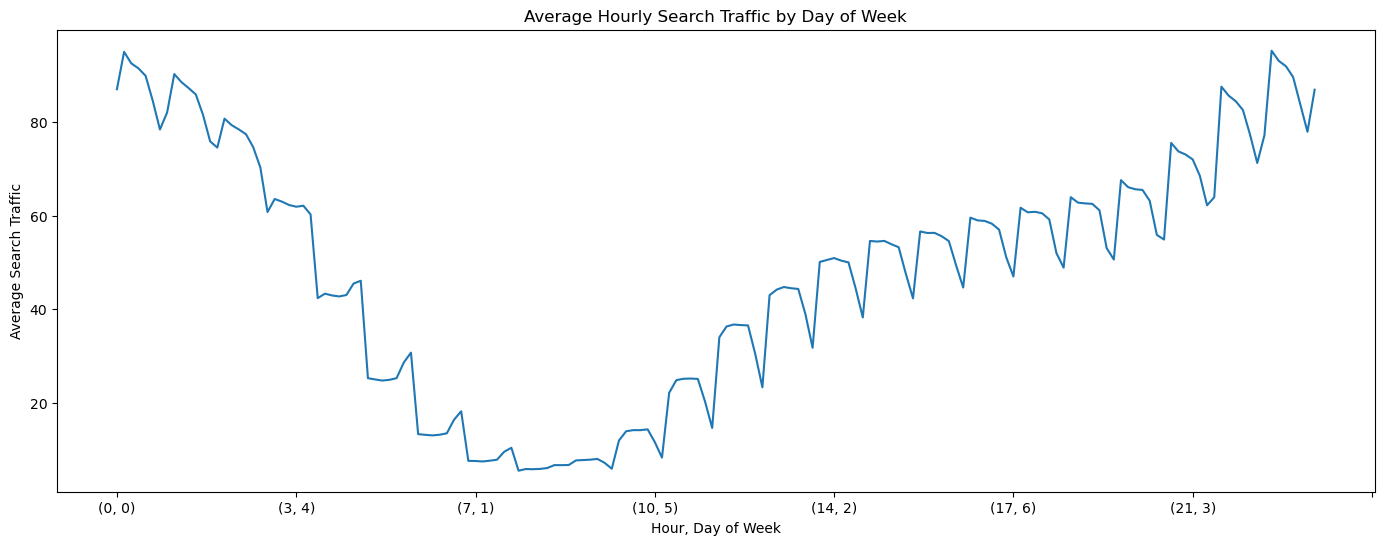

In [8]:
# Grouping the hourly search data to plot the average traffic by the day of week

df_mercado_trends["Search Trends"].groupby(by=[df_mercado_trends.index.hour, df_mercado_trends.index.dayofweek]).mean().plot(
    title="Average Hourly Search Traffic by Day of Week",
    xlabel="Hour, Day of Week",
    ylabel="Average Search Traffic",
    figsize=(17, 6),
    legend=False
)

plt.show()


In [9]:
# Using hvPlot for visualizing the hour of the day and day of week search traffic as a heatmap.

df_mercado_trends.hvplot(
    kind="heatmap",
    x="index.hour",
    y="index.dayofweek",
    c= "Search Trends",
    cmap="blues"
).aggregate(function=np.mean)


:HeatMap   [index.hour,index.dayofweek]   (Search Trends)

#### Answer the following question :

#### **Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** The search trend is seen higher on Tuesday than any other day. The search trends also seem to increase during 05hrs - 10hrs on Sunday.

C:\Users\prath\AppData\Local\Temp\ipykernel_13704\2808374207.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_mercado_trends["Search Trends"].groupby(by=[df_mercado_trends.index.hour, df_mercado_trends.index.week]).mean().plot(


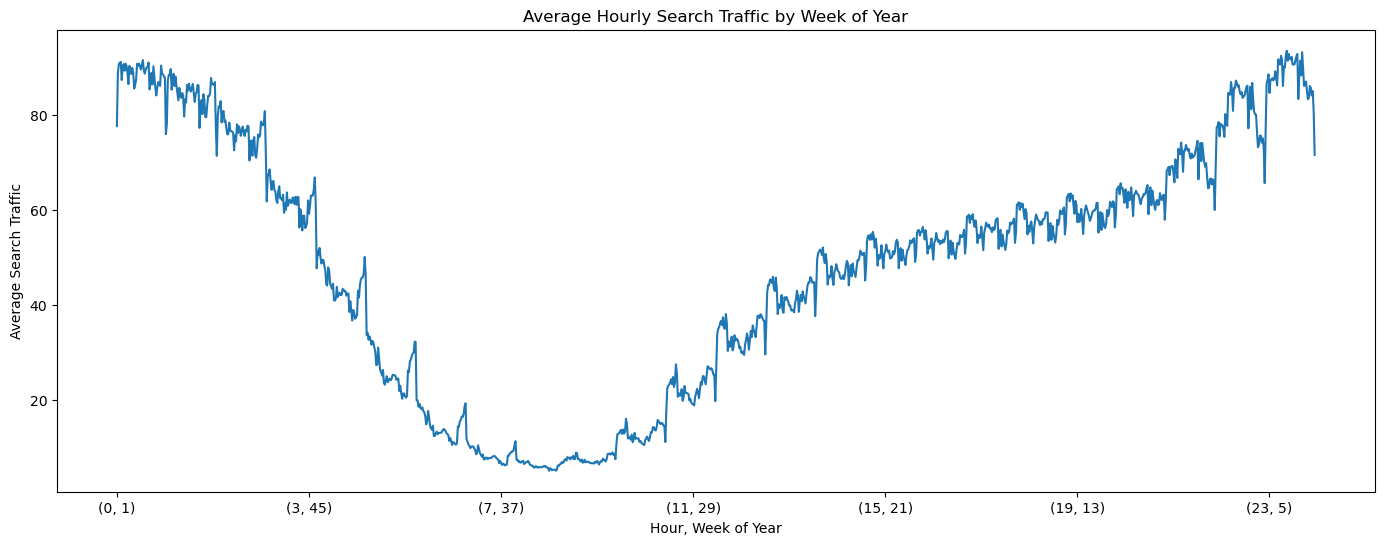

In [10]:
# Grouping the hourly search data to plot the average traffic by the week of the year

df_mercado_trends["Search Trends"].groupby(by=[df_mercado_trends.index.hour, df_mercado_trends.index.week]).mean().plot(
    title="Average Hourly Search Traffic by Week of Year",
    xlabel="Hour, Week of Year",
    ylabel="Average Search Traffic",
    figsize=(17, 6),
    legend=False
)

plt.show()


#### Answer the following question :

#### **Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** # YOUR ANSWER HERE

## Relating the Search Traffic to Stock Price Patterns

In [11]:
# Reading the "mercado_stock_price.csv" file using the Pandas read_csv function
# Setting the "date" column as the Datetime Index.

df_mercado_stock = pd.read_csv(
    Path(r"Resources\mercado_stock_price.csv").absolute(), 
    index_col="date", infer_datetime_format=True, parse_dates=True
    )

# View the first and last five rows of the DataFrame

display(df_mercado_stock.head())
display(df_mercado_stock.tail())


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [12]:
# Using hvPlot to visualize the closing price of the df_mercado_stock DataFrame

df_mercado_stock.hvplot(
    y="close",
    fontscale = 1.3,
    height = 400,
    width = 900,
    hover_cols=["close"],
    hover_color="grey",
    title="MercadoLibre Closing Stock Price",
    xlabel="Date",
    ylabel="Closing Price"
)


:Curve   [date]   (close)

In [13]:
# Concatenating the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenating the DataFrame by columns (axis=1), and drop any rows with only one column of data

mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1, join="inner").dropna()

# Viewing the first and last five rows of the DataFrame

display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends
2016-06-01 09:00:00,135.16,6
2016-06-01 10:00:00,136.63,12
2016-06-01 11:00:00,136.56,22
2016-06-01 12:00:00,136.42,33
2016-06-01 13:00:00,136.10,40


,close,Search Trends
2020-07-31 11:00:00,1105.780,20
2020-07-31 12:00:00,1087.925,32
2020-07-31 13:00:00,1095.800,41
2020-07-31 14:00:00,1110.650,47
2020-07-31 15:00:00,1122.510,53


In [14]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)

first_half_2020 = mercado_stock_trends_df.loc["2020-01-01" : "2020-06-30"]

# Viewing the first and last five rows of first_half_2020 DataFrame

display(first_half_2020.head())
display(first_half_2020.tail())


,close,Search Trends
2020-01-02 09:00:00,601.085,9
2020-01-02 10:00:00,601.290,14
2020-01-02 11:00:00,615.410,25
2020-01-02 12:00:00,611.400,37
2020-01-02 13:00:00,611.830,50


,close,Search Trends
2020-06-30 11:00:00,976.17,17
2020-06-30 12:00:00,977.50,27
2020-06-30 13:00:00,973.23,37
2020-06-30 14:00:00,976.50,45
2020-06-30 15:00:00,984.93,51


In [15]:
# Using hvPlot to visualize the close and Search Trends data
# Plotting each column on a separate axes using the following syntax
# `hvplot(y=["close", "Search Trends"], shared_axes=False, subplots=True).cols(1)`
# Setting the `fontscale` to 1.3, `height` to 400, and `width` to 900

first_half_2020.hvplot(
    y=["close", "Search Trends"],
    shared_axes=False,
    fontscale=1.3,
    height=400,
    width=750,
    subplots=True
).cols(1)


:NdLayout   [Variable]
   :Curve   [index]   (value)

##### Answer the following question :

#### **Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes, both time series indicate a common trend that's consistent with this narrative. When the search trends were down from the end of February, 2020 the stock prices continued to decline and when the search trends were peak high from the start of May, 2020 the prices started increasing.

In [16]:
# Creating a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

mercado_stock_trends_df["Lagged Search Trends"] = mercado_stock_trends_df["Search Trends"].shift(1)


In [17]:
# Creating a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

mercado_stock_trends_df["Stock Volatility"] = mercado_stock_trends_df["close"].rolling(window=4).std()


In [18]:
# Using hvPlot to visualize the stock volatility

display(mercado_stock_trends_df.hvplot(
    y="Stock Volatility",
    height=400,
    width=900,
    title="MercadoLibre Stock Volatility",
    xlabel="Date",
    ylabel="Stock Volatility"
))


:Curve   [index]   (Stock Volatility)

In [19]:
# Creating a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change() * 100


In [20]:
# Viewing the first and last five rows of the mercado_stock_trends_df DataFrame

display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12,6.0,NaN,1.087600
2016-06-01 11:00:00,136.56,22,12.0,NaN,-0.051233
2016-06-01 12:00:00,136.42,33,22.0,0.693848,-0.102519
2016-06-01 13:00:00,136.10,40,33.0,0.235142,-0.234570


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20,11.0,7.495900,0.637986
2020-07-31 12:00:00,1087.925,32,20.0,12.188462,-1.614697
2020-07-31 13:00:00,1095.800,41,32.0,7.393646,0.723855
2020-07-31 14:00:00,1110.650,47,41.0,10.169735,1.355174
2020-07-31 15:00:00,1122.510,53,47.0,15.408790,1.067843


In [21]:
# Constructing correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
# Also visualizing the correlation table using hvPlot

display(mercado_stock_trends_df[["Stock Volatility", "Lagged Search Trends", "Hourly Stock Return"]].corr())

display(mercado_stock_trends_df[["Stock Volatility", "Lagged Search Trends", "Hourly Stock Return"]].corr().hvplot(
    title="Correlation Table",
    xlabel="Stock Volatility, Lagged Search Trends, Hourly Stock Return",
    ylabel="Correlation",
    kind="heatmap",
    cmap="blues"
).aggregate(function=np.mean))


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.118945,0.046723
Lagged Search Trends,-0.118945,1.000000,0.017929
Hourly Stock Return,0.046723,0.017929,1.000000


:HeatMap   [columns,index]   (value)

#### Answer the following question :

#### **Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There is a low correlation between lagged search traffic and stock volatility but the relation between the lagged search traffic and the stock price returns is slightly more but not enough for a good predictable relationship.

## Creating a Time Series Model with Prophet

In [22]:
# Using the df_mercado_trends DataFrame, resetting the index so the date information is no longer the index

mercado_prophet_df = df_mercado_trends.reset_index()

# Labeling the columns ds and y so that the syntax is recognized by Prophet

mercado_prophet_df.columns = ["ds", "y"]

# Dropping any NaN values from the prophet_df DataFrame

mercado_prophet_df = mercado_prophet_df.dropna()

# Viewing the first and last five rows of the mercado_prophet_df DataFrame

display(mercado_prophet_df.head())


,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


In [23]:
# Calling the Prophet function, storing as an object

model_mercado_trends = Prophet()


In [24]:
# Ignoring warnings

warnings.simplefilter("ignore")

In [25]:
# Fitting the time-series model

model_mercado_trends.fit(mercado_prophet_df)


10:52:37 - cmdstanpy - INFO - Chain [1] start processing
10:53:00 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Creating a future dataframe to hold predictions
# Making the prediction go out as far as 2000 hours (approx 80 days)

future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq="H")

# Viewing the last five rows of the future_mercado_trends DataFrame

display(future_mercado_trends.tail())


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [27]:
# Making the predictions for the trend data using the future_mercado_trends DataFrame

forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Displaying the first five rows of the forecast_mercado_trends DataFrame

forecast_mercado_trends.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,80.876104,97.124236,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,77.634227,94.830425,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.189914,83.374662,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,52.424638,68.832821,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,35.438679,51.823314,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


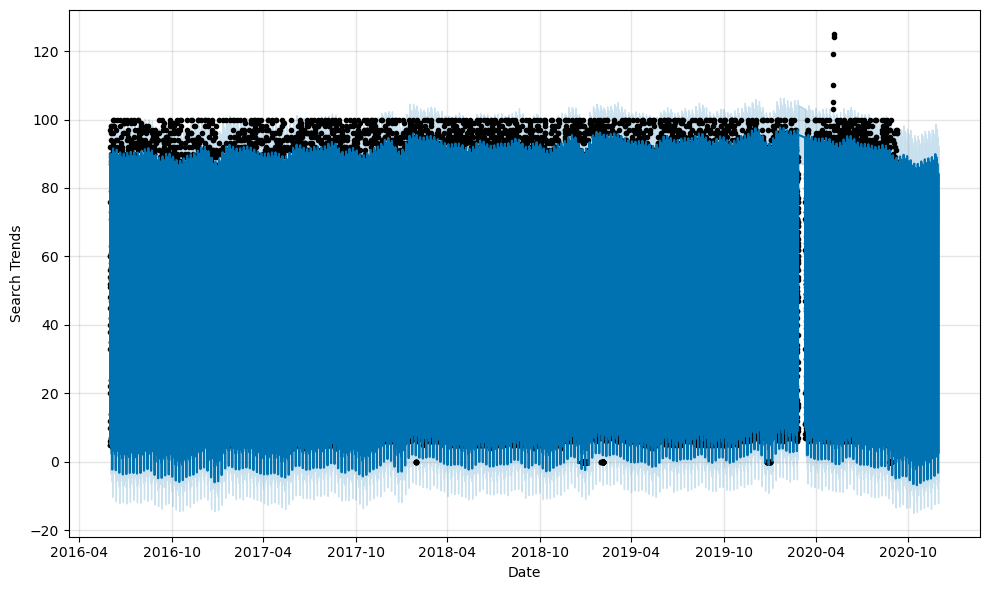

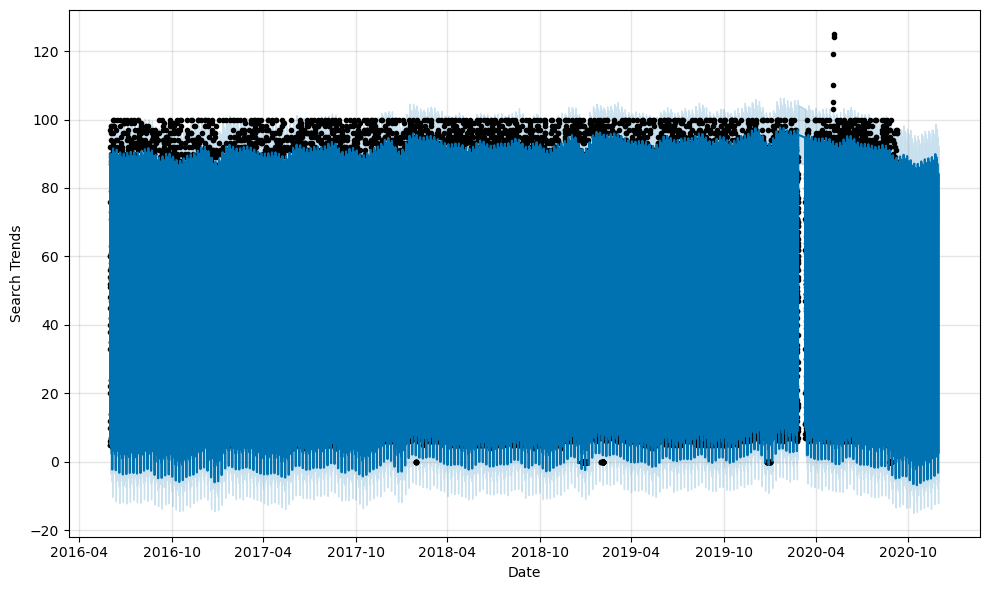

In [28]:
# Plotting the Prophet predictions for the Mercado trends data

display(model_mercado_trends.plot(forecast_mercado_trends, xlabel="Date", ylabel="Search Trends"))


#### Answer the following question :

#### **Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The popularity of MercadoLibre for the near term seems to sustain with a short decline and continued regular volatility.

In [29]:
# Setting the index in the forecast_mercado_trends DataFrame to the ds datetime column

forecast_mercado_trends = forecast_mercado_trends.set_index("ds")

# Viewing only the yhat,yhat_lower and yhat_upper columns from the DataFrame

display(forecast_mercado_trends[["yhat", "yhat_lower", "yhat_upper"]].tail())


,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.507473,30.294385,48.002020
2020-11-30 05:00:00,24.036286,15.182845,32.684085
2020-11-30 06:00:00,12.070566,3.407121,21.269750
2020-11-30 07:00:00,4.798365,-4.003811,12.800729
2020-11-30 08:00:00,2.603438,-5.650140,10.759897


In [30]:
# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

forecast_mercado_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-2000:,:].hvplot(
    xlabel="Date",
    ylabel="Search Trends",
    title="MercadoLibre Search Trends Forecast"
)


:NdOverlay   [Variable]
   :Curve   [ds]   (value)

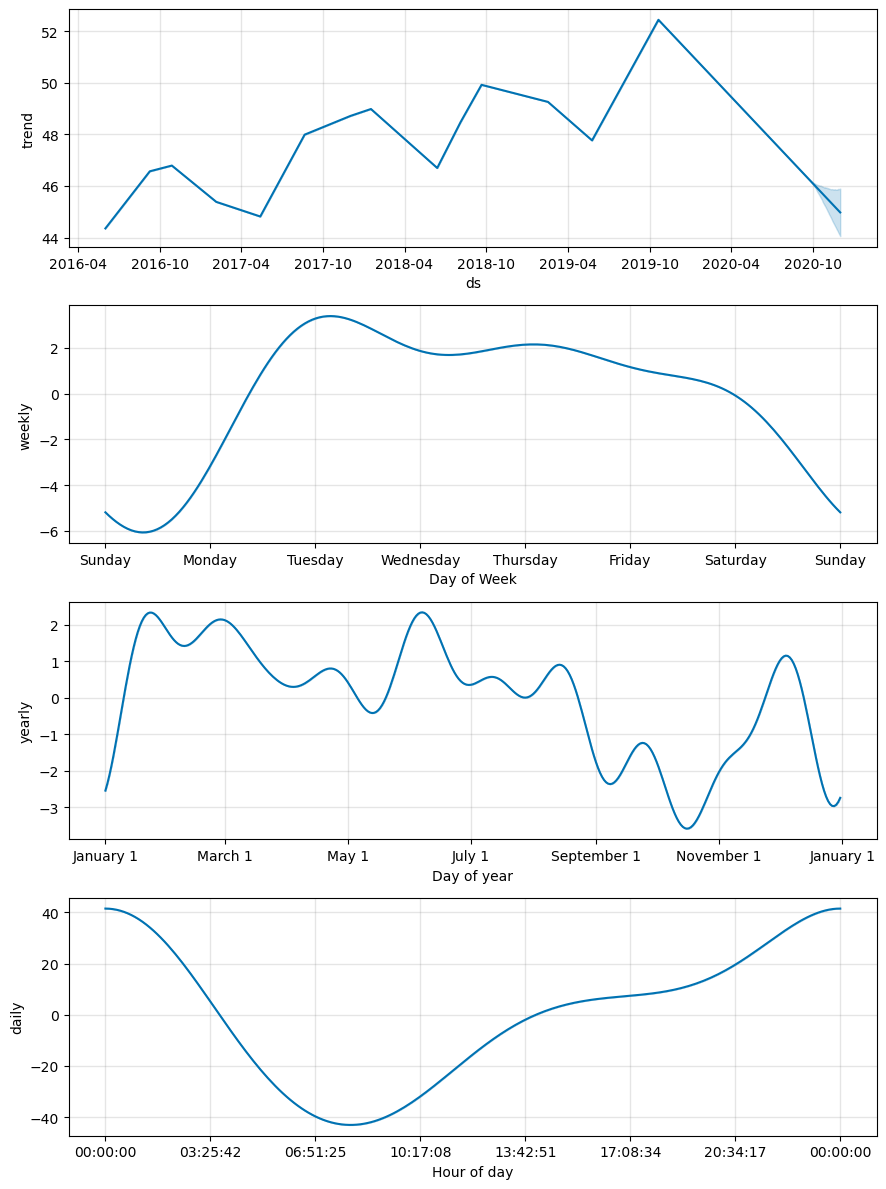

In [31]:
# Resetting the index in the forecast_mercado_trends DataFrame

forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Using the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame
 
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)


#### Answer the following questions :

#### **Question:** What time of day exhibits the greatest popularity?

**Answer:** According to the visualization the greatest popularity is seen near midnight and a little before that.

#### **Question:** Which day of week gets the most search traffic? 
   
**Answer:** The day of week that gets the most search traffic is Tuesday.

#### **Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The lowest search traffic is seen during mid October's.